In [5]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

In [6]:
# reload(Reader)

In [7]:
feature_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\feature\niu_jia_ling"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\niu_jia_ling"
wind_turbine = "20"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [8]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature, speed=speed)

feature.shape: (4425, 75)
speed.shape: (4425, 1)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

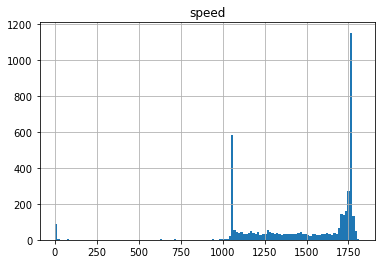

In [9]:
speed.hist(bins=128)

feature.shape: (4301, 75)
speed.shape: (4301, 1)


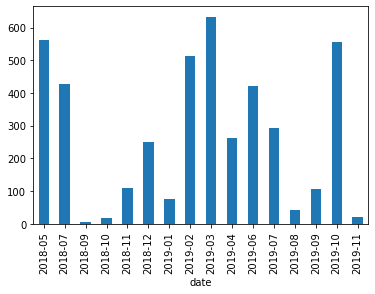

In [10]:
feature = feature[speed.speed >= 1000]
speed = speed[speed.speed >= 1000]

toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [11]:
# 划分train set, test set
train_start = "2018-05"
train_end = "2019-06"

test_start = "2019-07"
test_end = "2019"

feature_train = feature[train_start: train_end]
speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, speed_train=speed_train, feature_test=feature_test, speed_test=speed_test)

feature_train.shape: (3280, 75)
speed_train.shape: (3280, 1)
feature_test.shape: (1021, 75)
speed_test.shape: (1021, 1)


In [12]:
feature_test = feature
speed_test = speed

In [13]:
detector = model_entry.OutlierDetector()

In [14]:
detector.fit(feature_train)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.











<AxesSubplot:xlabel='date'>

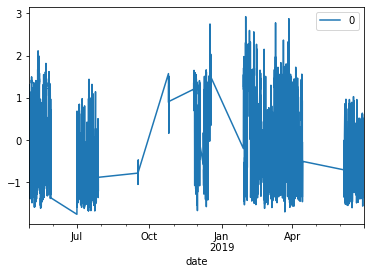

In [15]:
detector.decision_scores.plot()

In [16]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

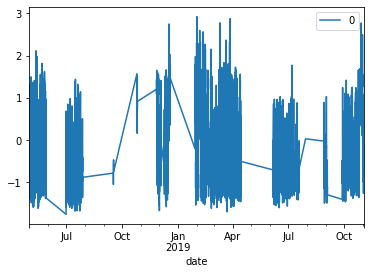

In [17]:
anomaly_scores.plot()